In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,confusion_matrix,classification_report,cohen_kappa_score
from keras.layers import GaussianNoise
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense,Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
%matplotlib inline
print('Librairies imported')

Importing librairies...


Using TensorFlow backend.


Librairies imported


In [4]:
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
df_15min = pd.read_csv('20190526 data prepared.csv')
df_15min = df_15min.iloc[:,1:]
df_15min = df_15min.dropna()
df_15min.reset_index(inplace=True,drop=True)

In [6]:
df_15min.isnull().sum().sum()

0

In [7]:
df_15min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 21 columns):
Date                  6441 non-null object
Varop_Spy             6441 non-null float64
Varhl_spy             6441 non-null float64
RSI                   6441 non-null float64
75 - RSI              6441 non-null float64
RSI - 25              6441 non-null float64
BBD_Delta_Up          6441 non-null float64
delta5_8              6441 non-null float64
delta8_10             6441 non-null float64
delta10_12            6441 non-null float64
delta12_15            6441 non-null float64
delta15_30            6441 non-null float64
delta30_35            6441 non-null float64
delta35_40            6441 non-null float64
delta40_45            6441 non-null float64
delta45_50            6441 non-null float64
delta_tsf             6441 non-null float64
Forcast Oscillator    6441 non-null float64
target_up             6441 non-null int64
target_down           6441 non-null int64
target_value      

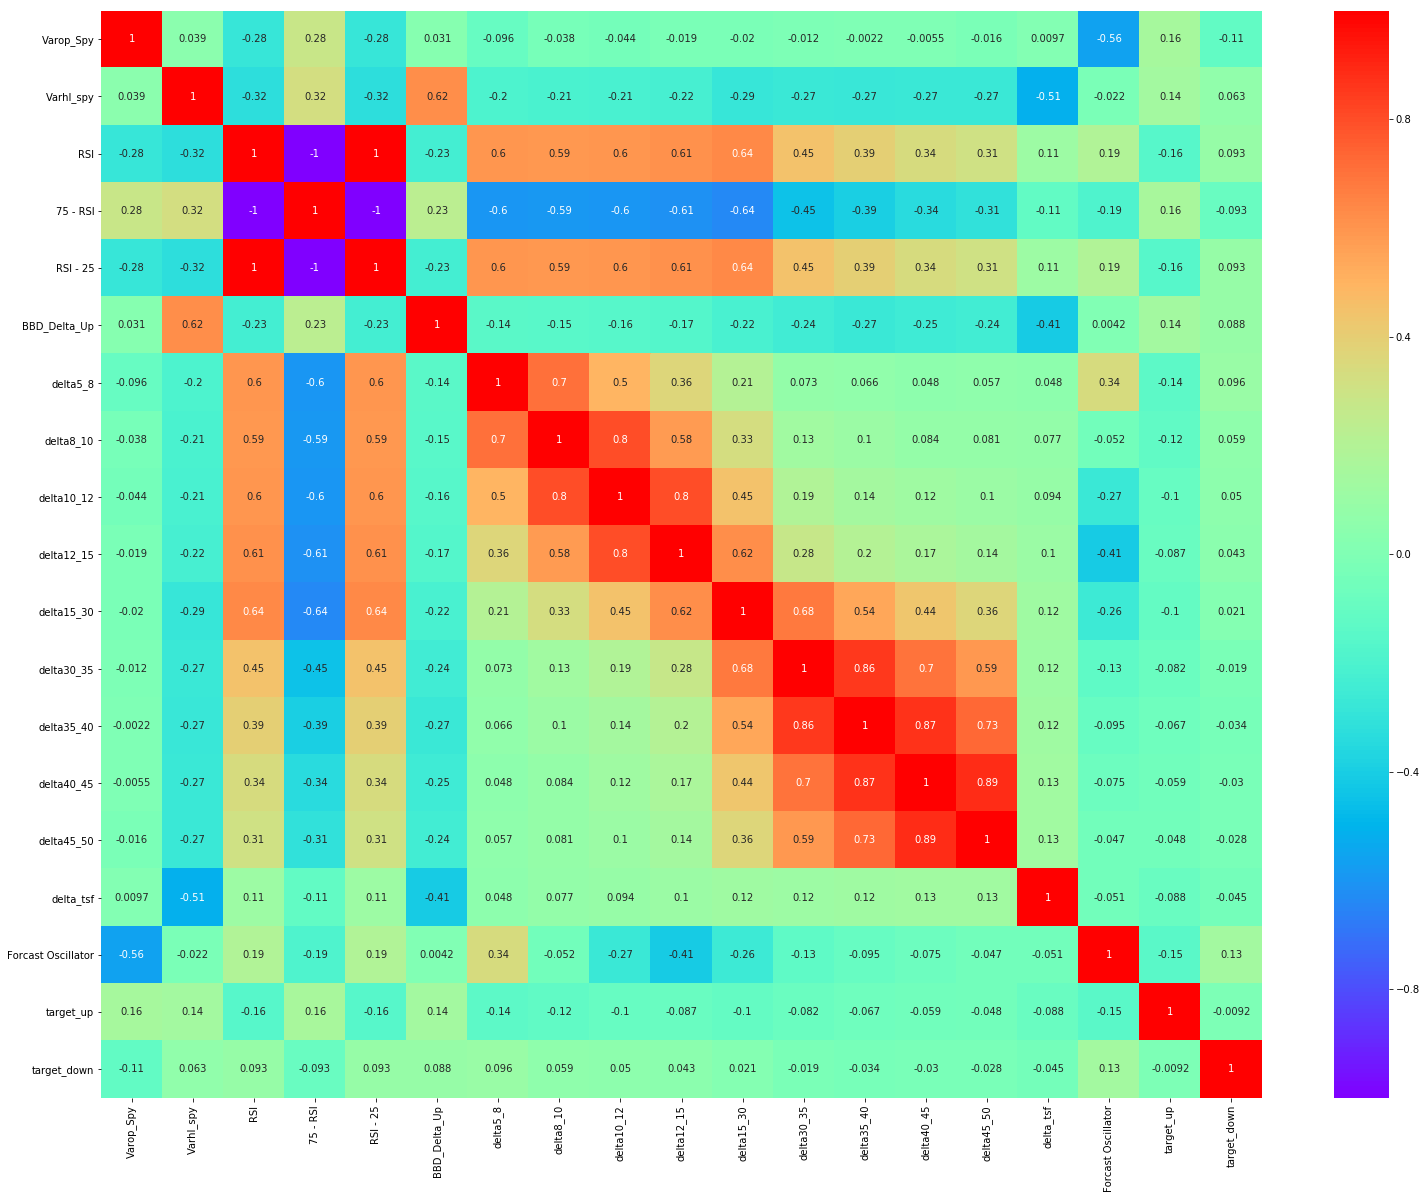

In [8]:
plt.figure(figsize=(26,20))
sns.heatmap(df_15min.iloc[:,:-1].corr(),annot=True,cmap='rainbow')
plt.show()

In [9]:
df_15min.shape

(6441, 21)

In [10]:
df_15min['target_up'].sum(),df_15min['target_down'].sum()

(59, 59)

In [11]:
#df_15min = df_15min.iloc[-2500:,:]
#df_15min['target_up'].sum(),df_15min['target_down'].sum()

In [12]:
delta = round(df_15min.shape[0])
bloc1 = round(delta*0.9)
bloc2 = delta - bloc1
print("# of periods : ",delta)
print('On 80% - 20% slash : ')
print('Bloc 1 : ',bloc1,' periods (',df_15min.iloc[bloc1,0],')\nBloc 2 :',bloc2,' periods (',df_15min.iloc[bloc2,0],')')
print('First period :',df_15min.iloc[0,0])
print('Last period :',df_15min.iloc[df_15min.shape[0]-1,0])


# of periods :  6441
On 80% - 20% slash : 
Bloc 1 :  5797  periods ( 20190426  17:00:00 )
Bloc 2 : 644  periods ( 20180711  16:15:00 )
First period : 20180604  21:15:00
Last period : 20190531  21:45:00


In [13]:
df_15min.head(0)

,Date,Varop_Spy,Varhl_spy,RSI,75 - RSI,RSI - 25,BBD_Delta_Up,delta5_8,delta8_10,delta10_12,...,delta15_30,delta30_35,delta35_40,delta40_45,delta45_50,delta_tsf,Forcast Oscillator,target_up,target_down,target_value


In [14]:
X = df_15min.iloc[:,1:-3]
y_up = df_15min.iloc[:,-3].values
y_down = df_15min.iloc[:,-2].values

In [15]:
X.head(0)

,Varop_Spy,Varhl_spy,RSI,75 - RSI,RSI - 25,BBD_Delta_Up,delta5_8,delta8_10,delta10_12,delta12_15,delta15_30,delta30_35,delta35_40,delta40_45,delta45_50,delta_tsf,Forcast Oscillator


In [16]:
Xtrain = X.iloc[:bloc1,:]
Xtest = X.iloc[bloc1:,:]
ytrain_up = y_up[:bloc1]
ytest_up = y_up[bloc1:]
ytrain_down = y_down[:bloc1]
ytest_down = y_down[bloc1:]

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)
#y_up = scaler.fit_transform(np.array(y_up).reshape(-1,1))
#y_down = scaler.fit_transform(np.array(y_down).reshape(-1,1))
y_up = np.array(y_up).reshape(-1,1)
y_down = np.array(y_down).reshape(-1,1)

In [18]:
Xtrain.shape,ytrain_up.shape,ytrain_down.shape,ytest_down.shape,ytest_up.shape

((5797, 17), (5797,), (5797,), (644,), (644,))

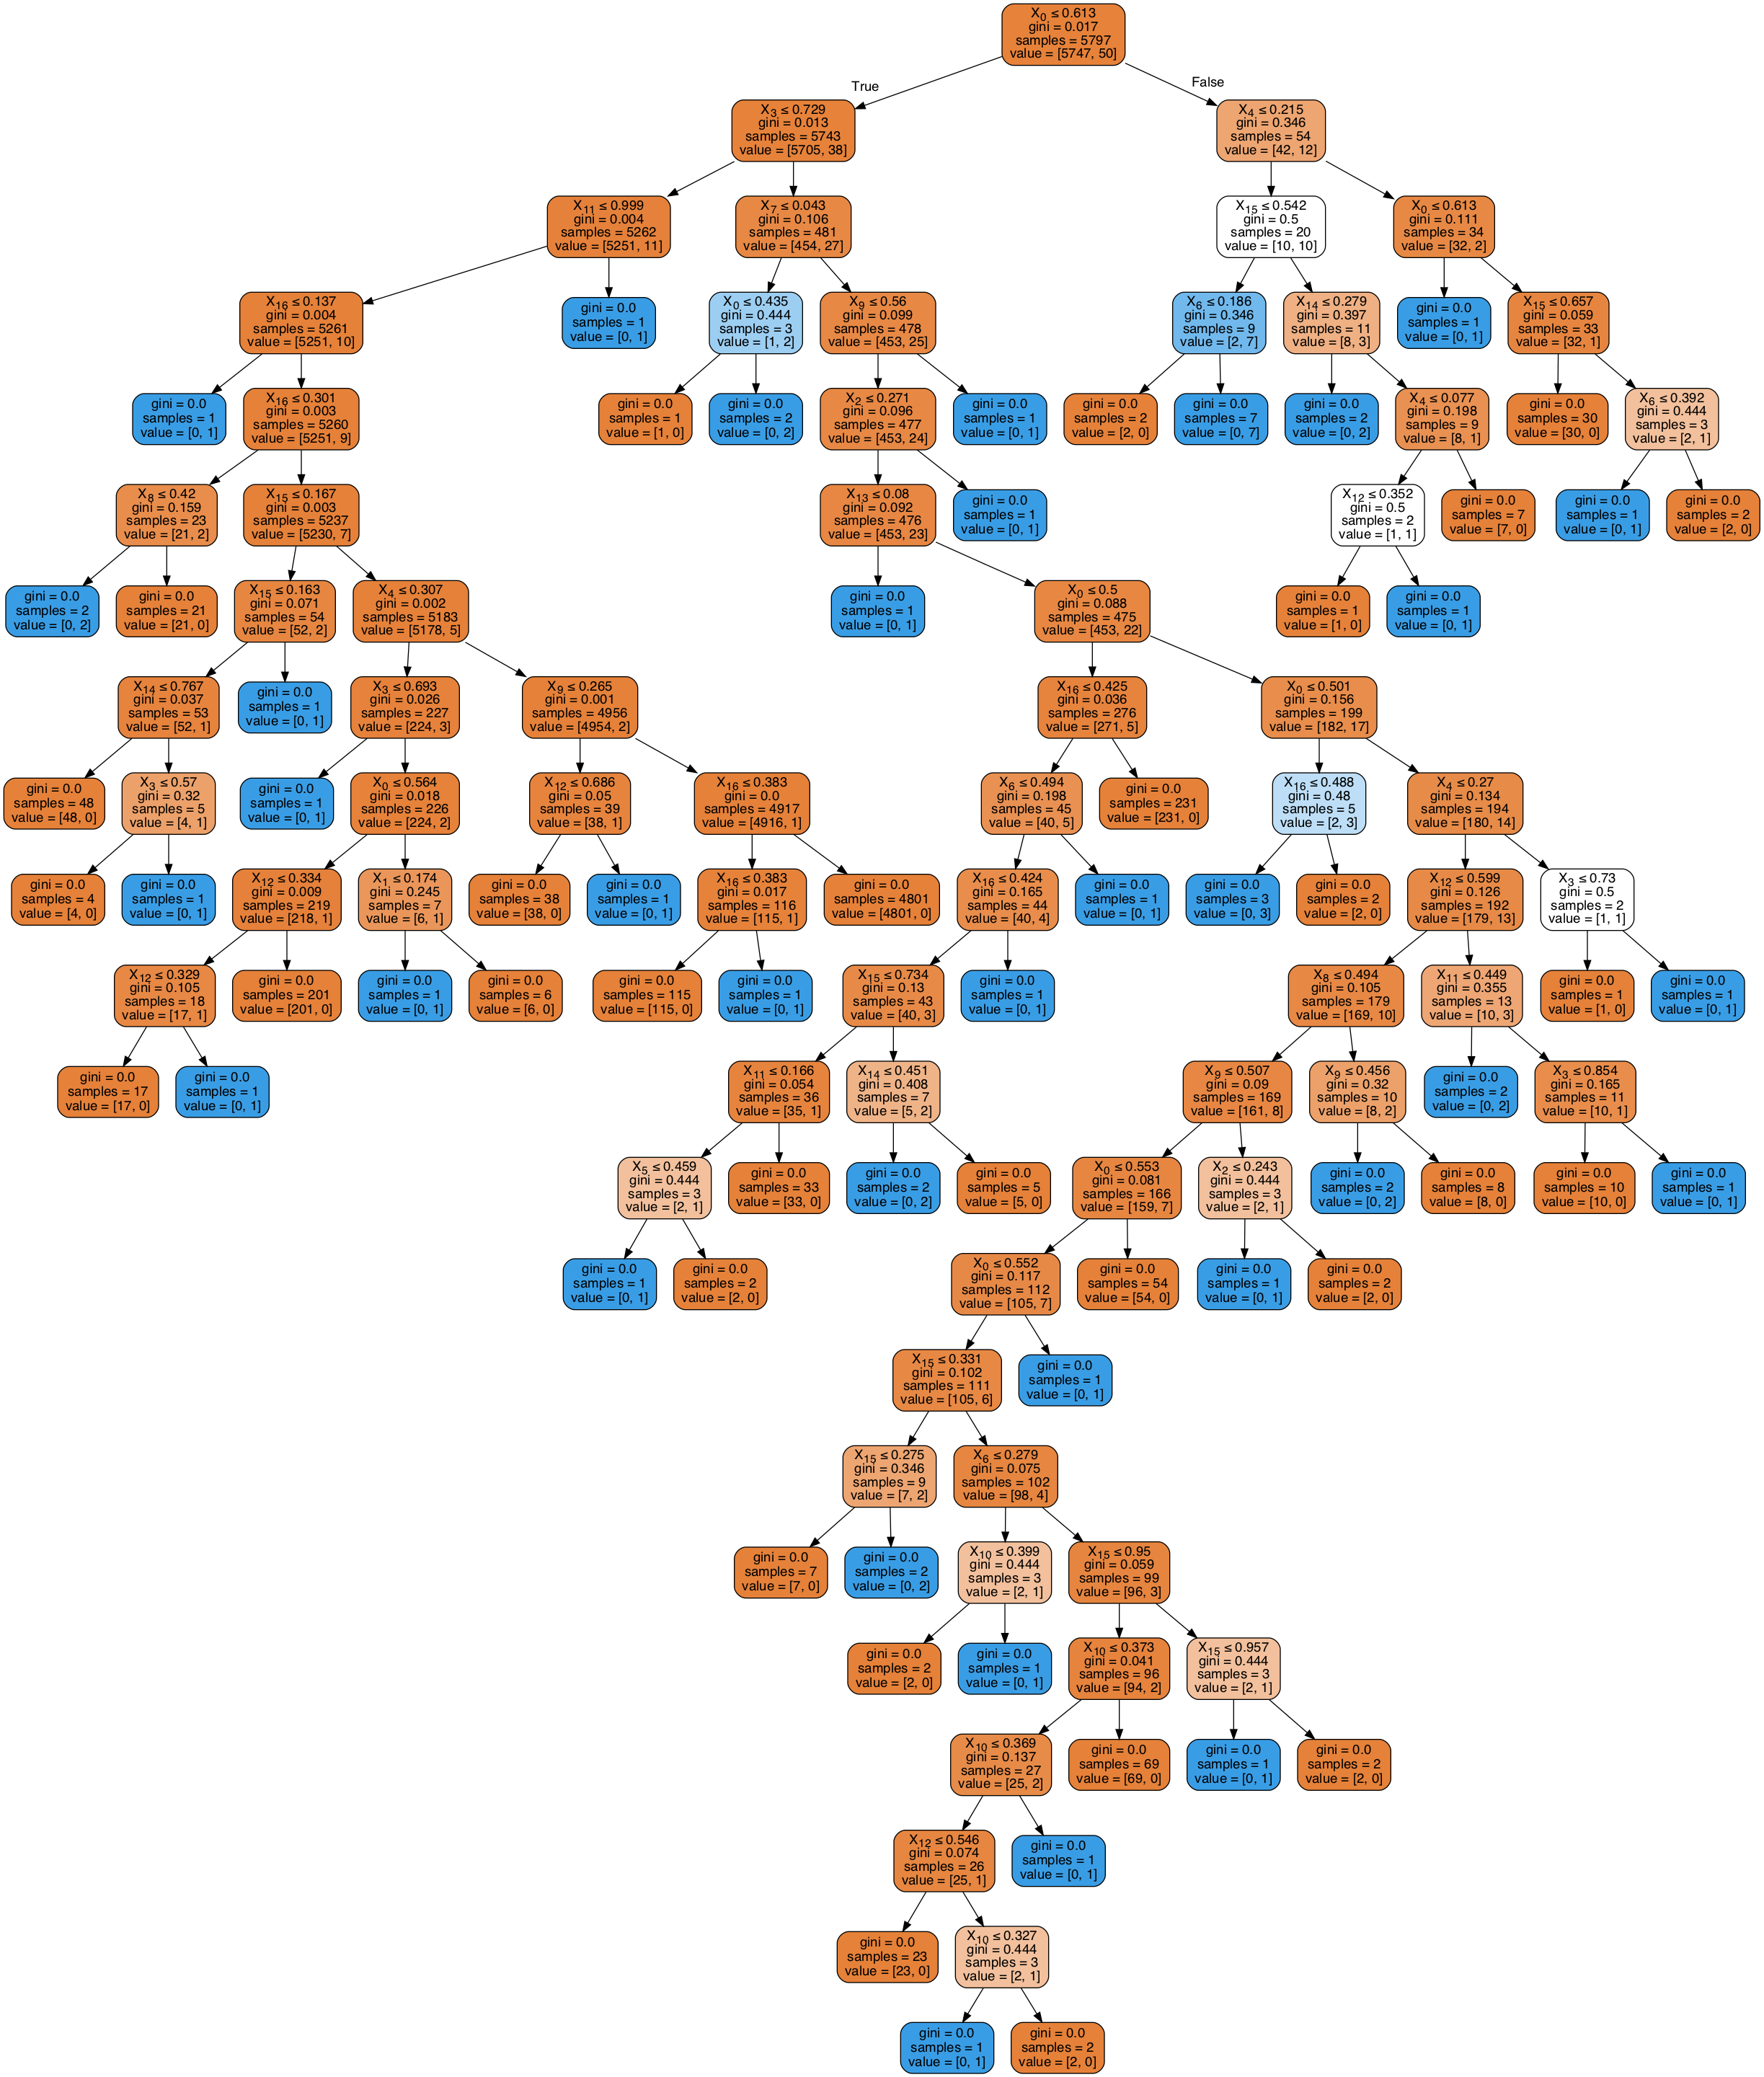

In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus

def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(Xtrain, ytrain_up)

jupyter_graphviz(dtree, filled=True, rounded=True, special_characters=True)